Copyright 2020 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Regression trees: Problem solving

In this session we will look at the `mpg` dataset, which contains measurements of fuel economy and other properties of cars from the 1970s.

Our goal is to predict miles per gallon.

| Variable     | Type     | Description                              |
|:--------------|:----------|:------------------------------------------|
| mpg          | Ratio    | Miles per gallon; fuel economy           |
| cylinders    | Ordinal  | Number of cylinders in engine            |
| displacement | Ratio    | Volume inside cylinders (likely inches)                  |
| horsepower   | Ratio    | Unit of power                            |
| weight       | Ratio    | Weight of car (likely pounds)                           |
| acceleration | Ratio    | Acceleration of car (likely in seconds to 60 MPH) |
| model_year   | Interval | Year of car manufacture; last two digits |
| origin       | Nominal  | Numeric code corresponding to continent  |
| name     | Nominal  | Car model name (ID)                      |

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
</div>

## Import libraries

We need to load our data into a dataframe and do some plots, so import `pandas` and `plotly.express` below.

In [4]:
import pandas as pd
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/%IFN5#t2uAm}E`8:KV:">pd</variable><variable id="YtOOS!JE-+8IZ!JNUh]l">px</variable></variables><block type="importAs" id="_@5-r*j4E`}d?=DXLinf" x="16" y="10"><field name="libraryName">pandas</field><field name="VAR" id="/%IFN5#t2uAm}E`8:KV:">pd</field><next><block type="importAs" id="k)WXmx+7tU4zC$jYXhJw"><field name="libraryName">plotly.express</field><field name="VAR" id="YtOOS!JE-+8IZ!JNUh]l">px</field></block></next></block></xml>

Load `"datasets/mpg.csv"` into a dataframe, using `index_col=` to tell it to use `"name"` as an ID.

In [6]:
dataframe = pd.read_csv('datasets/mpg.csv',index_col="name")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="SI@^,P?H2_w62.Ew9{z*">dataframe</variable><variable id="/%IFN5#t2uAm}E`8:KV:">pd</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="-105" y="137"><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field><value name="VALUE"><block type="varDoMethod" id="ny0sjvqTnn2B]K2za7Li"><mutation items="2"></mutation><field name="VAR" id="/%IFN5#t2uAm}E`8:KV:">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/mpg.csv</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="#SWWDt|[b*)iHTwAfM_K"><field name="CODE">index_col="name"</field></block></value></block></value></block><block type="variables_get" id="q1)x{YWm@)fhD*6[EJGf" x="-81" y="398"><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field></block></xml>

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1


The last time we looked at this data, we used the `mpg-nona` dataset that I'd already removed the `NaN` from.

This `mpg` still has `NaN`, so remove them.

In [8]:
dataframe = dataframe.dropna()

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="SI@^,P?H2_w62.Ew9{z*">dataframe</variable></variables><block type="variables_set" id="9fdSqn(p63;|xF2dsBzV" x="-58" y="248"><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field><value name="VALUE"><block type="varDoMethod" id="k414[4+X9^ReM#GZsDps"><mutation items="1"></mutation><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field><field name="MEMBER">dropna</field><data>dataframe:dropna</data></block></value></block><block type="variables_get" id="W=AALkkNnq64,NQ~6w6." x="-60" y="304"><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field></block></xml>

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1


Get the five figure summary (descriptive statistics) of the data using `describe`.

In [10]:
dataframe.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="SI@^,P?H2_w62.Ew9{z*">dataframe</variable></variables><block type="varDoMethod" id="!Zc!z*.{~{;mL/TXW,^H" x="8" y="188"><mutation items="1"></mutation><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data></block></xml>

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


------------------
**QUESTION:**

Do the min/max/mean of these values look OK to you?

**ANSWER: (click here to edit)**

*Yes, they all seem to make sense.*
<hr>

Ultimately we want to predict miles per gallon (`mpg`), so make a histogram of that.

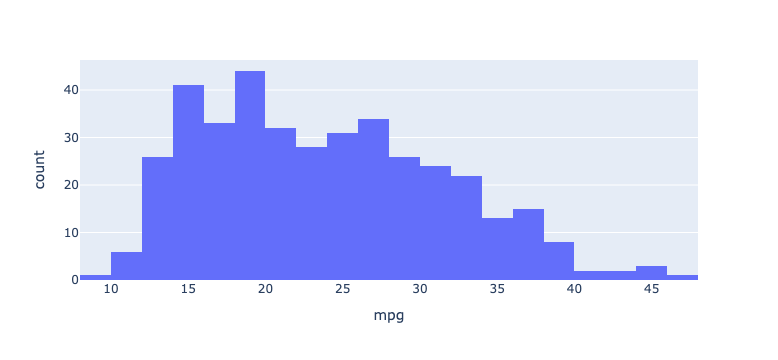

In [12]:
px.histogram(dataframe,x="mpg")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="YtOOS!JE-+8IZ!JNUh]l">px</variable><variable id="SI@^,P?H2_w62.Ew9{z*">dataframe</variable></variables><block type="varDoMethod" id="BA;^5Vw*oM|6hd_74/:@" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="YtOOS!JE-+8IZ!JNUh]l">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="variables_get" id="xcKQ|UB~$Lic5K+++,]}"><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="Z6+99ubtI^8E_8qB=7Vu"><field name="CODE">x="mpg"</field></block></value></block></xml>

------------------
**QUESTION:**

Do you think we need to transform `mpg` to make it more normal? Why or why not?

**ANSWER: (click here to edit)**

*It's pretty much bell shaped now, so I think it's fine.*
<hr>

Use `plotly` to make a `scatter_matrix` of the dataframe.
If you have a hard time reading the labels, you can give it something like `width=1000` and `height=1000` to make it bigger.

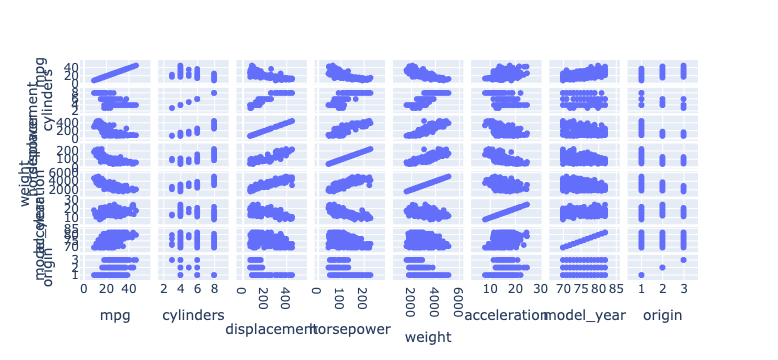

In [14]:
px.scatter_matrix(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="YtOOS!JE-+8IZ!JNUh]l">px</variable><variable id="SI@^,P?H2_w62.Ew9{z*">dataframe</variable></variables><block type="varDoMethod" id="BA;^5Vw*oM|6hd_74/:@" x="0" y="0"><mutation items="1"></mutation><field name="VAR" id="YtOOS!JE-+8IZ!JNUh]l">px</field><field name="MEMBER">scatter_matrix</field><data>px:scatter_matrix</data><value name="ADD0"><block type="variables_get" id="xcKQ|UB~$Lic5K+++,]}"><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field></block></value></block></xml>

-----------------
**QUESTION:**

Looking at the scatterplot matrix, which variables have curved (nonlinear) relationships with `mpg`?

**ANSWER: (click here to edit)**

*Displacement, horsepower, weight, and acceration are curved*

<hr>

**QUESTION:**

What do you think would be better for this data, linear regression or a regression tree? Why?

**ANSWER: (click here to edit)**


*A regression tree would probably be better because of the nonlinear relationships, which linear regression can't model*
<hr>

## Prepare train/test sets

You need to split the data into train/test sets.

Start by dropping the label, `mpg` to make a new dataframe called `X`.

Save a dataframe with just `mpg` in `Y`. 

In [16]:
X = dataframe.drop(columns=["mpg"])

Y = dataframe[['mpg']]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable><variable id="SI@^,P?H2_w62.Ew9{z*">dataframe</variable></variables><block type="variables_set" id="M9g^9:hbZQ0Cb9jKq9V6" x="-22" y="85"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><value name="VALUE"><block type="varDoMethod" id="k7t38%eJz)@=B8{vW^(u"><mutation items="1"></mutation><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field><field name="MEMBER">drop</field><data>dataframe:drop</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="fk{P(H^@/_!^1+tw-Hi*"><field name="CODE">columns=["mpg"]</field></block></value></block></value></block><block type="variables_set" id="A/{OGL825.2|zl]Pe^/X" x="-20" y="211"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field><value name="VALUE"><block type="indexer" id="JJ!pli[y(Kob1,@A!H|A"><field name="VAR" id="SI@^,P?H2_w62.Ew9{z*">dataframe</field><value name="INDEX"><block type="lists_create_with" id="5nH7kNbU}!/TT_F:#b;x"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="XZJHIkBK~O3,J~n.$j50"><field name="TEXT">mpg</field></block></value></block></value></block></value></block></xml>

Import `sklearn.model_selection` to split the data into train/test sets.

In [19]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable></variables><block type="importAs" id="E{QJ$O@lc8u.;OTWdVgf" x="-89" y="168"><field name="libraryName">sklearn.model_selection</field><field name="VAR" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field></block></xml>

And do the actual split.

In [21]:
splits = model_selection.train_test_split(X,Y,random_state=1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable></variables><block type="variables_set" id="HpD!.HSC`PPRg]21i*7c" x="-23" y="72"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field><value name="VALUE"><block type="varDoMethod" id="fUetl3$Ak=SI~T6T5!6c"><mutation items="3"></mutation><field name="VAR" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="ADD0"><block type="variables_get" id="jN^;NIVaV%22*W_^|!uK"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></value><value name="ADD1"><block type="variables_get" id="OOZSj;YDm{T6q%{~5?B1"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="Gg*^%q4qIJwc*of,V|rb"><field name="CODE">random_state=1</field></block></value></block></value></block></xml>

## Fit models

Fit two models, a linear regression model and a regression tree model.

Import the `sklearn.tree` and `sklearn.linear_model` libraries.

In [25]:
import sklearn.tree as tree
import sklearn.linear_model as linear_model

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="tkeU~z;dQ]^6[?rbF?)9">tree</variable><variable id="cGnMvhq5543q[r$:Og-x">linear_model</variable></variables><block type="importAs" id="goc_V=/,8MnTaM{TCljC" x="50" y="70"><field name="libraryName">sklearn.tree</field><field name="VAR" id="tkeU~z;dQ]^6[?rbF?)9">tree</field><next><block type="importAs" id="T+2[8x{hGt/|GLh2xlS$"><field name="libraryName">sklearn.linear_model</field><field name="VAR" id="cGnMvhq5543q[r$:Og-x">linear_model</field></block></next></block></xml>

### Linear regression model 

Create the linear regression model.

In [27]:
lm = linear_model.LinearRegression()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable><variable id="cGnMvhq5543q[r$:Og-x">linear_model</variable></variables><block type="variables_set" id="kQmyFi!|3ETIOi1@|LJ6" x="35" y="272"><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><value name="VALUE"><block type="varCreateObject" id="AJDD:e}}mjM~tRz.rWTR"><mutation items="1"></mutation><field name="VAR" id="cGnMvhq5543q[r$:Og-x">linear_model</field><field name="MEMBER">LinearRegression</field><data>linear_model:LinearRegression</data></block></value></block></xml>

Fit the linear regression model and get predictions.

In [29]:
lm.fit(splits[0],splits[2])

lmPredictions = lm.predict(splits[1])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable><variable id="ty]z2lzV|f{hCWniG*SJ">lmPredictions</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="varDoMethod" id="-@fm,911cJiCu@jkys%R" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">fit</field><data>lm:fit</data><value name="ADD0"><block type="lists_getIndex" id="W~.ZU([-)(,-i3=bTsB|"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="GIJn[jpD_~wa}#7IO!1K"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="Rh[;nrMLN$[cFFsZC~T|"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="YkCD57xF*SSN3[`_op{u"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="M@?wn}aoHxJYan0=AE3$"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="jNUa2BdXPG?H8|.br*@e"><field name="NUM">3</field></block></value></block></value></block><block type="variables_set" id="8GF@]VO%5B2QY(9W8S42" x="1" y="195"><field name="VAR" id="ty]z2lzV|f{hCWniG*SJ">lmPredictions</field><value name="VALUE"><block type="varDoMethod" id="_[M^?b_]5WAk~%i)W7vs"><mutation items="1"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">predict</field><data>lm:predict</data><value name="ADD0"><block type="lists_getIndex" id="uk!H]Ac4Jb-{:Gm,nnj["><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="7cK(q-9*S_,V0/|Yvf=g"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="+{r,qcOEw@AR=6_4oMG8"><field name="NUM">2</field></block></value></block></value></block></value></block></xml>

### Regression tree model

Create the regression tree model.

In [31]:
model = tree.DecisionTreeRegressor(ccp_alpha=0.004)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="y)}CJbWuNk[5e38?/#{t">model</variable><variable id="tkeU~z;dQ]^6[?rbF?)9">tree</variable></variables><block type="variables_set" id="zW~dc)uX.9yIdvHf.vvz" x="74" y="231"><field name="VAR" id="y)}CJbWuNk[5e38?/#{t">model</field><value name="VALUE"><block type="varCreateObject" id="0I6gCe=.wV.oI1[UHnIf"><mutation items="1"></mutation><field name="VAR" id="tkeU~z;dQ]^6[?rbF?)9">tree</field><field name="MEMBER">DecisionTreeRegressor</field><data>tree:DecisionTreeRegressor</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="hB)+jESMQM{e2WM[;CMJ"><field name="CODE">ccp_alpha=0.004</field></block></value></block></value></block></xml>

Fit the regression tree model and get predictions.

In [33]:
model.fit(splits[0],splits[2])

predictions = model.predict(splits[1])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="y)}CJbWuNk[5e38?/#{t">model</variable><variable id=".hU+?FvKPIm~!dS$d-nj">predictions</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="varDoMethod" id="-@fm,911cJiCu@jkys%R" x="0" y="0"><mutation items="2"></mutation><field name="VAR" id="y)}CJbWuNk[5e38?/#{t">model</field><field name="MEMBER">fit</field><data>model:fit</data><value name="ADD0"><block type="lists_getIndex" id="W~.ZU([-)(,-i3=bTsB|"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="GIJn[jpD_~wa}#7IO!1K"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="Rh[;nrMLN$[cFFsZC~T|"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="YkCD57xF*SSN3[`_op{u"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="M@?wn}aoHxJYan0=AE3$"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="jNUa2BdXPG?H8|.br*@e"><field name="NUM">3</field></block></value></block></value></block><block type="variables_set" id="8GF@]VO%5B2QY(9W8S42" x="1" y="195"><field name="VAR" id=".hU+?FvKPIm~!dS$d-nj">predictions</field><value name="VALUE"><block type="varDoMethod" id="_[M^?b_]5WAk~%i)W7vs"><mutation items="1"></mutation><field name="VAR" id="y)}CJbWuNk[5e38?/#{t">model</field><field name="MEMBER">predict</field><data>model:predict</data><value name="ADD0"><block type="lists_getIndex" id="uk!H]Ac4Jb-{:Gm,nnj["><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="7cK(q-9*S_,V0/|Yvf=g"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="+{r,qcOEw@AR=6_4oMG8"><field name="NUM">2</field></block></value></block></value></block></value></block></xml>

## Evaluate the models

For the linear regression model:

- Get the $r^2$ on the *training* set

- Get the $r^2$ on the *testing* set

In [35]:
print('Training r2:' + str(lm.score(splits[0],splits[2])))
print('Testing r2:' + str(lm.score(splits[1],splits[3])))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="~IM}M:,`?~tIB8VB1m^X" x="-47" y="306"><value name="TEXT"><block type="text_join" id="SP${6|~=}gsMxiy4{Nq6"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="A9Io`Zzs7V]5]Q{u_YJb"><field name="TEXT">Training r2:</field></block></value><value name="ADD1"><block type="varDoMethod" id="%!VjUHB:+Srn(8bKuAIJ"><mutation items="2"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">score</field><data>lm:score</data><value name="ADD0"><block type="lists_getIndex" id="d#d#BS{ihm?]_9Sy!`n1"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="Hz=Ub^QN}T3,w[Q~vkCp"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id=";~m;0oTRak[R?]rp!IkI"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="G/?J@!@Zg}9|fSK;WcH:"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="V$Rp`[Cu:yN7vsE5_b+w"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="~R]wA!S4a75y!9c.F{9d"><field name="NUM">3</field></block></value></block></value></block></value></block></value><next><block type="text_print" id="|-ERRuo3*XHY80H}YhXF"><value name="TEXT"><block type="text_join" id=";Te5E~GtH9dv8{qp[U:@"><mutation items="2"></mutation><value name="ADD0"><block type="text" id=":-11rvnXpgdoNr[C_:^a"><field name="TEXT">Testing r2:</field></block></value><value name="ADD1"><block type="varDoMethod" id="R==U1*znQ/jMAW#;s]29"><mutation items="2"></mutation><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">score</field><data>lm:score</data><value name="ADD0"><block type="lists_getIndex" id="i084N_e9(a%L7p.SDi.s"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="S%I(G6amV-zzpHsiM#;Y"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="F.D=M4Lo7*q?IwMyCy;["><field name="NUM">2</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id=".JqtS=TqJGtibpup#b%@"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="wh]FU*Pa{:_=vg)k_4iA"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="/SbPu0b2ew/^kOIk%h^G"><field name="NUM">4</field></block></value></block></value></block></value></block></value></block></next></block></xml>

Training r2:0.8153339627635714
Testing r2:0.8295700536937245


For the regression tree model:

- Get the $r^2$ on the *training* set

- Get the $r^2$ on the *testing* set

In [37]:
print('Training r2:' + str(model.score(splits[0],splits[2])))
print('Testing r2:' + str(model.score(splits[1],splits[3])))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="y)}CJbWuNk[5e38?/#{t">model</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="~IM}M:,`?~tIB8VB1m^X" x="-47" y="306"><value name="TEXT"><block type="text_join" id="SP${6|~=}gsMxiy4{Nq6"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="A9Io`Zzs7V]5]Q{u_YJb"><field name="TEXT">Training r2:</field></block></value><value name="ADD1"><block type="varDoMethod" id="%!VjUHB:+Srn(8bKuAIJ"><mutation items="2"></mutation><field name="VAR" id="y)}CJbWuNk[5e38?/#{t">model</field><field name="MEMBER">score</field><data>model:score</data><value name="ADD0"><block type="lists_getIndex" id="d#d#BS{ihm?]_9Sy!`n1"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="Hz=Ub^QN}T3,w[Q~vkCp"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id=";~m;0oTRak[R?]rp!IkI"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="G/?J@!@Zg}9|fSK;WcH:"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="V$Rp`[Cu:yN7vsE5_b+w"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="~R]wA!S4a75y!9c.F{9d"><field name="NUM">3</field></block></value></block></value></block></value></block></value><next><block type="text_print" id="|-ERRuo3*XHY80H}YhXF"><value name="TEXT"><block type="text_join" id=";Te5E~GtH9dv8{qp[U:@"><mutation items="2"></mutation><value name="ADD0"><block type="text" id=":-11rvnXpgdoNr[C_:^a"><field name="TEXT">Testing r2:</field></block></value><value name="ADD1"><block type="varDoMethod" id="R==U1*znQ/jMAW#;s]29"><mutation items="2"></mutation><field name="VAR" id="y)}CJbWuNk[5e38?/#{t">model</field><field name="MEMBER">score</field><data>model:score</data><value name="ADD0"><block type="lists_getIndex" id="i084N_e9(a%L7p.SDi.s"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="S%I(G6amV-zzpHsiM#;Y"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="F.D=M4Lo7*q?IwMyCy;["><field name="NUM">2</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id=".JqtS=TqJGtibpup#b%@"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="wh]FU*Pa{:_=vg)k_4iA"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="/SbPu0b2ew/^kOIk%h^G"><field name="NUM">4</field></block></value></block></value></block></value></block></value></block></next></block></xml>

Training r2:0.9977064714296578
Testing r2:0.7945172423947277


------------------
**QUESTION:**

Compare the two models with respect to their *training data performance*. Which is better?
Now compare the two models with respect to their *testing data performance*. Which is better?
What do these differences tell you?

**ANSWER: (click here to edit)**

*The regression tree model has a much better fit on the training data than the linear regression.
The regression tree model and the linear model are about the same on the testing data.
This suggests that the regression tree has overfit the training data (because it has a big performance loss on the testing data, but overfitting the data this way hasn't negatively impacted its performance relative to linear regression.
This further suggests that with appropriate pruning, the regression tree model would be even better than*
<hr>

## Penalize the regression tree

Start with `ccp_alpha=0.004` and look at peformance.
Try a few values less than this and greater than this (max of 1.0).

------------------
**QUESTION:**

What values did you try? Did any of them do better than linear regression on the test set?

**ANSWER: (click here to edit)**

*.004 is pretty close to as good performance as I got. Bigger values were worse*
<hr>

## Visualize the model

If you have time, try to do this for whatever value of `ccp_alpha` you liked the best.

Import `graphviz`.

In [41]:
import graphviz as graphviz

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="rrXqQ:9R(~X0,}F[1UD]">graphviz</variable></variables><block type="importAs" id="7{/s^=v`Fuc^Gk2M%VYV" x="16" y="36"><field name="libraryName">graphviz</field><field name="VAR" id="rrXqQ:9R(~X0,}F[1UD]">graphviz</field></block></xml>

Create the graph and display it.

To save you time, here are the feature names: `"cylinders","displacement","horsepower","weight","acceleration","model_year","origin"`

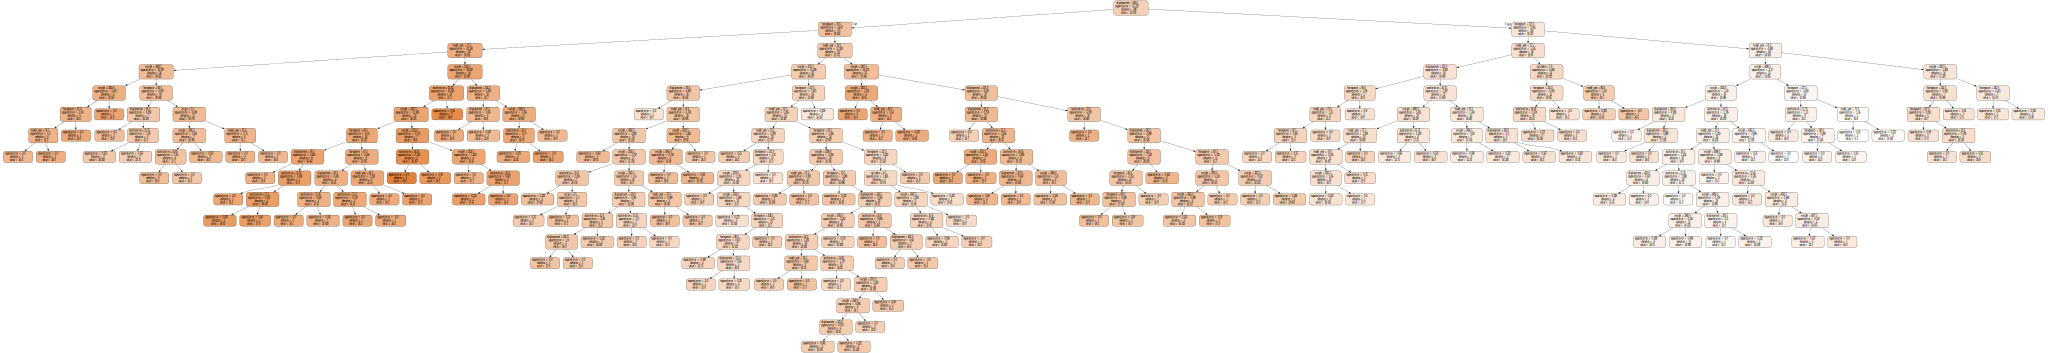

In [43]:
dot_data = tree.export_graphviz(model,out_file=None,feature_names=["cylinders","displacement","horsepower","weight","acceleration","model_year","origin"],class_names=['mpg'],filled=True,rounded=True,special_characters=True)

graphviz.Source(dot_data)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F.ej=Hud7vT9uozVaF5C">dot_data</variable><variable id="rrXqQ:9R(~X0,}F[1UD]">graphviz</variable><variable id="tkeU~z;dQ]^6[?rbF?)9">tree</variable><variable id="y)}CJbWuNk[5e38?/#{t">model</variable></variables><block type="variables_set" id=":6*zm74#9$!O3?QVUukE" x="33" y="70"><field name="VAR" id="F.ej=Hud7vT9uozVaF5C">dot_data</field><value name="VALUE"><block type="varDoMethod" id="jsRyzb,9t~G^G@G@SMkS"><mutation items="7"></mutation><field name="VAR" id="tkeU~z;dQ]^6[?rbF?)9">tree</field><field name="MEMBER">export_graphviz</field><data>tree:export_graphviz</data><value name="ADD0"><block type="variables_get" id="x$]b$%X#}qjO@0H/!O|N"><field name="VAR" id="y)}CJbWuNk[5e38?/#{t">model</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="K!=:ty3DMPs#b^ziH=5p"><field name="CODE">out_file=None</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="by]EM[Y$kMG~MfF0{q^,"><field name="CODE">feature_names=["cylinders","displacement","horsepower","weight","acceleration","model_year","origin"]</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock" id="2hz~E.{8:W9-wWb*9Ut~"><field name="CODE">class_names=['mpg']</field></block></value><value name="ADD4"><block type="dummyOutputCodeBlock" id="^IJ3b3Eg7K9k^6Of_4i%"><field name="CODE">filled=True</field></block></value><value name="ADD5"><block type="dummyOutputCodeBlock" id="VH!NxdBRgItjnN]Zs^Uh"><field name="CODE">rounded=True</field></block></value><value name="ADD6"><block type="dummyOutputCodeBlock" id="f*|7fCy,K/0{_WzfribG"><field name="CODE">special_characters=True</field></block></value></block></value></block><block type="varCreateObject" id="112,RjG4uBP/IYpAL!NY" x="36" y="403"><mutation items="1"></mutation><field name="VAR" id="rrXqQ:9R(~X0,}F[1UD]">graphviz</field><field name="MEMBER">Source</field><data>graphviz:Source</data><value name="ADD0"><block type="variables_get" id="!_lPB2E+UI{S0Fxx-M;@"><field name="VAR" id="F.ej=Hud7vT9uozVaF5C">dot_data</field></block></value></block></xml>

------------------
**QUESTION:**

Explain the top three nodes in your tree.

**ANSWER: (click here to edit)**

*If displacement (engine volume) is less that 190.5, see if horsepower is < 70.5.
If displacement is bigger than 190.5, see if horsepower is < 127.
This seems to make sense because bigger engines will use more gas, and horsepower will use more gas*
<hr>


-------------------

**QUESTION:**

Which model do you prefer, linear regression or regression trees, in this situation, and why?

**ANSWER: (click here to edit)**

*Linear regression. It seems to have about the same fit or better, no overfit, and is a simpler model to understand.*

-------------------

<!--  -->

<!-- path = model.cost_complexity_pruning_path(splits[0], splits[2])
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(splits[0], splits[2])
    clfs.append(clf)
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
px.scatter(x=ccp_alphas,y=node_counts) -->